In [3]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package stopwords to /home/ali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ali/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/ali/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
import pandas as pd
import re # for regular expressions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [5]:
import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 13.5 MB/s eta 0:00:000:00:01m eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [6]:
# set pandas to display full text for better inspection
pd.set_option("display.max_colwidth", None)

#load the dataaset from the csv file

try:
    df= pd.read_csv("imdb_DataSet.csv")
except FileNotFoundError:
    print("error: file not found")

#display the first five rows and columns
print("first 5 rows of the dataset")
display(df.head())

first 5 rows of the dataset


,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [7]:
print("\nDataset information")
df.info()


Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
print("\nSentiment Distribution: ")
print(df["sentiment"].value_counts())


Sentiment Distribution: 
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [9]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [11]:
def preprocess_text(text):
    """
    Cleans and preprocesses a single text string.
    1. Removes HTML tags
    2. Lowercases text
    3. Removes punctuation and numbers
    4. Tokenizes text
    5. Removes stop words
    6. Lemmatizes words
    """
    text = re.sub(r'<.*?>', '', text)
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization is often better than stemming
    text = ' '.join(tokens)
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    
    return ' '.join(lemmatized_tokens)

In [19]:
print("preprocessing all 50,000 reviews... this may take a while")
df = df.sample(500).copy()

# Apply preprocessing to create the cleaned_review column
df['cleaned_review'] = df['review'].apply(preprocess_text)

print("preprocessing completed")

print("\nComparing original vs cleaned reviews:")
display(df[['review', 'cleaned_review']].head())

preprocessing all 50,000 reviews... this may take a while
preprocessing completed

Comparing original vs cleaned reviews:


,review,cleaned_review
33750,"Reading the other user comments, the review by A666333 has articulated most of what I was feeling throughout this film- predictable storyline, cliché versions of lesbians/heterosexuals (i.e. straight woman becomes a lesbian while concluding that her husband is abusive and aggressive). <br /><br />Also, the score was severely disappointing. It was bland, soft, sentimental elevator music- another common cliché in movies about lesbians. The movie would have had a few interesting dramatic moments if they had not been destroyed by the music.<br /><br />A few scenes concerning sex and eroticism also struck me as attempts to titillate and raise shock value, including parts of the final performance scene. The conventional ""hot and steamy"" moments were as boring as the overly sentimental score. For example during the pool scene, the women are kissing, and then the camera pans along the abandoned wine glass, the flowing water, the sound of their heavy breathing over the soft crashing of waves.<br /><br />The only elements I liked were the costuming and arobatics. They are well-choreographed, and the development of attraction between the two characters felt very natural during the training scenes. I genuinely smiled during those, and during the last scene with the police officer. But they were not enough to balance out the negatives or make me enjoy this film.",read user comment review articulate feeling throughout film predictable storyline clich version lesbiansheterosexual ie straight woman become lesbian conclude husband abusive aggressive also score severely disappointing bland soft sentimental elevator music another common clich movie lesbian movie would interesting dramatic moment destroy musica scene concern sex eroticism also strike attempt titillate raise shock value include part final performance scene conventional hot steamy moment bore overly sentimental score example pool scene woman kiss camera pan along abandon wine glass flow water sound heavy breathing soft crash wavesthe element like costume arobatic wellchoreographe development attraction two character feel natural training scene genuinely smile last scene police officer enough balance negative make enjoy film
12273,"Happy 25th Birthday to Valley Girl! Great soundtrack, plausible story, wonderful performances...captures the spirit of the 80's; the slang of the mainstreams and the outcasts. A wonderful rendition of high school life and ""gritty downtown"" from a suburban perspective.<br /><br />The soundtrack contains songs by Modern English, Felony, Josie Cotton, Sparks, Payola$, Josie Cotton, The Plimsouls, The Psychedelic Furs, Men At Work, The Flirts and Bananarama.<br /><br />This movie truly is Romeo and Juliet (minus the double suicide) set in 1980's Los Angeles. Julie's dad, played by Frederic Forrest (Sonny Bono, anyone?) is hysterical as a hippie idealistic dad who wonders how he sprung such a materialistic offspring. Yet, he doesn't judge, ya dig??",happy th birthday valley girl great soundtrack plausible story wonderful performancescapture spirit slang mainstreams outcast wonderful rendition high school life gritty downtown suburban perspectivethe soundtrack contain song modern english felony josie cotton spark payola josie cotton plimsouls psychedelic fur man work flirt bananaramathis movie truly romeo juliet minus double suicide set los angeles july dad play frederic forrest sonny bono anyone hysterical hippie idealistic dad wonder spring materialistic offspring yet do not judge ya dig
18703,"Seeing the title of this movie ""Stupid Teenagers Must Die"" made me believe this was a spoof of some kind. I discovered later on the original title was ""Blood and Guts"". Both titles are misleading, though. This is not a spoof, neither a serious splatter movie. This is something in between, failing in both areas. A group of teenagers is attending a séance at a spooky house and then the killing starts. Sounds over familiar, doesn't it

In [22]:
from sklearn.model_selection import train_test_split
df['sentiment_numeric'] = df['sentiment'].map({'positive': 1, 'negative': 0})

X = df["cleaned_review"]
y = df["sentiment_numeric"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"training size set: {len(X_train)}")
print(f"Testing size set: {len(X_test)}")

training size set: 400
Testing size set: 100


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
# max_features=5000 means we only use the 5000 most common words, which is efficient
tfidf = TfidfVectorizer(max_features=5000)

# Fit the vectorizer on the training data and transform it
X_train_tfidf = tfidf.fit_transform(X_train)

# ONLY transform the test data using the already-fitted vectorizer
X_test_tfidf = tfidf.transform(X_test)

print(f"Shape of the training TF-IDF matrix: {X_train_tfidf.shape}")
print(f"Shape of the testing TF-IDF matrix: {X_test_tfidf.shape}")

Shape of the training TF-IDF matrix: (400, 5000)
Shape of the testing TF-IDF matrix: (100, 5000)


In [25]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
# solver='liblinear' is a good choice for this type of problem
model = LogisticRegression(solver='liblinear')
model.fit(X_train_tfidf, y_train)

print("Model training complete!")

Model training complete!


In [26]:
def predict_sentiment(text):
    """
    Takes a raw text string and predicts its sentiment using the trained model.
    """
    # 1. Preprocess the text using the same function from Cell 2
    cleaned_text = preprocess_text(text)
    
    # 2. Vectorize the text using the SAME fitted TF-IDF vectorizer from Cell 5
    vectorized_text = tfidf.transform([cleaned_text])
    
    # 3. Predict using the trained model from Cell 6
    prediction = model.predict(vectorized_text)
    
    # 4. Return the human-readable result
    return 'Positive' if prediction[0] == 1 else 'Negative'

# --- Test Cases ---
review_1 = "This movie was absolutely fantastic! The acting was superb and the plot was gripping."
review_2 = "I was so bored throughout the entire film. It was a complete waste of time and money."
review_3 = "The film was okay, not great but not terrible either. Some parts were good."

print(f"Review: '{review_1}'\nPredicted Sentiment: {predict_sentiment(review_1)}\n")
print(f"Review: '{review_2}'\nPredicted Sentiment: {predict_sentiment(review_2)}\n")
print(f"Review: '{review_3}'\nPredicted Sentiment: {predict_sentiment(review_3)}\n")

Review: 'This movie was absolutely fantastic! The acting was superb and the plot was gripping.'
Predicted Sentiment: Negative

Review: 'I was so bored throughout the entire film. It was a complete waste of time and money.'
Predicted Sentiment: Negative

Review: 'The film was okay, not great but not terrible either. Some parts were good.'
Predicted Sentiment: Positive



Model Accuracy: 0.7900

Classification Report:
              precision    recall  f1-score   support

    Negative       0.77      0.84      0.80        51
    Positive       0.82      0.73      0.77        49

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.79      0.79      0.79       100



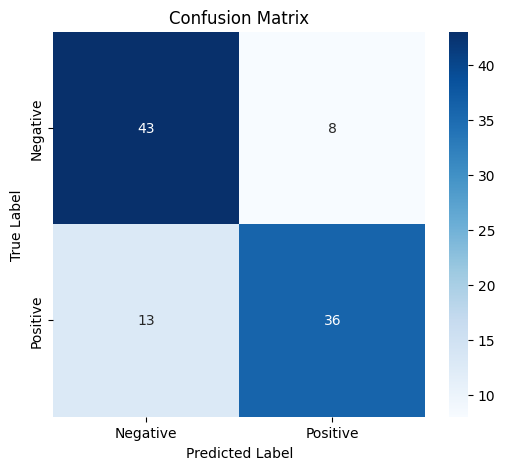

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print the detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()